In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df_aisles = pd.read_csv('/content/gdrive/MyDrive/CP1/aisles.csv')
df_depart = pd.read_csv('/content/gdrive/MyDrive/CP1/departments.csv')
df_order_product= pd.read_csv('/content/gdrive/MyDrive/CP1/order_products__prior.csv')
df_order_product = pd.concat([df_order_product,pd.read_csv('/content/gdrive/MyDrive/CP1/order_products__train.csv')])
df_orders = pd.read_csv('/content/gdrive/MyDrive/CP1/orders.csv')
df_product = pd.read_csv('/content/gdrive/MyDrive/CP1/products.csv')

In [ ]:
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [ ]:
df_depart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [ ]:
df_order_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 1.3 GB


In [ ]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [4]:
df = pd.merge(df_product, df_aisles, on = ['aisle_id', 'aisle_id'])
df = pd.merge(df, df_depart, on = ['department_id', 'department_id'])
df = pd.merge(df_order_product, df, on = ['product_id', 'product_id'])
df = pd.merge(df, df_orders, on = ['order_id', 'order_id'])
df.drop(columns = ['product_id','aisle_id','department_id','eval_set'], inplace = True)

In [5]:
df = df[['order_id',
          'user_id',
          'product_name',
          'aisle',
          'department',
          'order_number',
          'order_dow',
          'order_hour_of_day',
          'days_since_prior_order',
          'add_to_cart_order',
          'reordered']]

In [ ]:
df.isnull().sum()

order_id                        0
user_id                         0
product_name                    0
aisle                           0
department                      0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
add_to_cart_order               0
reordered                       0
dtype: int64

In [6]:
df_nan = df.days_since_prior_order.isnull()
df[df_nan].sort_values('order_number')

,order_id,user_id,product_name,aisle,department,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered
500,5733,92179,Organic Egg Whites,eggs,dairy eggs,1,6,10,NaN,8,0
23205585,3296930,86580,Organic Hearty Garden Vegetable Soup,soup broth bouillon,canned goods,1,0,14,NaN,13,0
23205584,3296930,86580,Almonds & Sea Salt in Dark Chocolate,candy chocolate,snacks,1,0,14,NaN,7,0
23205583,3296930,86580,Direct Trade House Blend Medium Roast Ground C...,coffee,beverages,1,0,14,NaN,17,0
23205582,3296930,86580,Corn Tortillas,tortillas flat bread,bakery,1,0,14,NaN,20,0
...,...,...,...,...,...,...,...,...,...,...,...
12298116,746450,175355,Diet Dr.Pepper Soda Pack,soft drinks,beverages,1,0,16,NaN,2,0
12298115,746450,175355,Tortilla Triangles Restaurant Style Chips,chips pretzels,snacks,1,0,16,NaN,22,0
12298114,746450,175355,Roasted Salted Almonds,nuts seeds dried fruit,snacks,1,0,16,NaN,10,0
12298127,746450,175355,Berries & Kale Fruit & Veggies Blend,missing,missing,1,0,16,NaN,27,0


In [7]:
df['days_since_prior_order'] = df['days_since_prior_order'].fillna(0)

In [ ]:
df.isnull().sum()

order_id                  0
user_id                   0
product_name              0
aisle                     0
department                0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
add_to_cart_order         0
reordered                 0
dtype: int64

In [8]:
df

,order_id,user_id,product_name,aisle,department,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered
0,2,202279,Organic Egg Whites,eggs,dairy eggs,3,5,9,8.0,1,1
1,2,202279,Michigan Organic Kale,fresh vegetables,produce,3,5,9,8.0,2,1
2,2,202279,Garlic Powder,spices seasonings,pantry,3,5,9,8.0,3,0
3,2,202279,Coconut Butter,oils vinegars,pantry,3,5,9,8.0,4,1
4,2,202279,Natural Sweetener,baking ingredients,pantry,3,5,9,8.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...
33819101,2839453,170084,Sport Deluxe Adjustable Black Ankle Stabilizer,muscles joints pain relief,personal care,4,0,16,0.0,1,0
33819102,1362475,184060,King Crab Legs,seafood counter,meat seafood,4,4,6,30.0,1,0
33819103,2666238,51836,Disinfecting Toilet Bowl Cleaner,cleaning products,household,12,0,18,0.0,1,0
33819104,2770035,37237,"Indoor & Outdoor Allergies, Allergy & Congesti...",cold flu allergy,personal care,50,6,16,2.0,1,0


In [9]:
orders_df = df.groupby('order_id').mean()
orders_df.user_id = orders_df.user_id.astype(int)
orders_df

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered
order_id,,,,,,,
1,112108,4.0,4.0,10.0,9.0,4.5,0.500000
2,202279,3.0,5.0,9.0,8.0,5.0,0.666667
3,205970,16.0,5.0,17.0,12.0,4.5,1.000000
4,178520,36.0,1.0,9.0,7.0,7.0,0.923077
5,156122,42.0,6.0,16.0,9.0,13.5,0.807692
...,...,...,...,...,...,...,...
3421079,108687,6.0,1.0,13.0,0.0,1.0,0.000000
3421080,52726,2.0,1.0,11.0,2.0,5.0,0.444444
3421081,117076,1.0,3.0,11.0,0.0,4.0,0.000000


In [10]:
recency_df = orders_df[['user_id', 'days_since_prior_order']].groupby('user_id').mean().reset_index().rename(columns={'days_since_prior_order':'recency_avg'})
recency_df.recency_avg = recency_df.recency_avg.astype(int)
recency_df

,user_id,recency_avg
0,1,17
1,2,15
2,3,11
3,4,11
4,5,9
...,...,...
206204,206205,12
206205,206206,3
206206,206207,13
206207,206208,7


In [11]:
frequency_df = orders_df[['user_id','order_number']].groupby('user_id').count().reset_index().rename(columns={'order_number':'frequency'})
frequency_df 

,user_id,frequency
0,1,11
1,2,15
2,3,12
3,4,5
4,5,5
...,...,...
206204,206205,4
206205,206206,67
206206,206207,16
206207,206208,49


In [12]:
quant_prod_per_order = df[['order_id','product_name']].groupby('order_id').count().reset_index().rename(columns={'product_name':'quant_product'})

# user related with each order
orders_df = df[['order_id','user_id']].groupby('order_id').mean().reset_index()
orders_df.user_id = orders_df.user_id.astype(int)

# join the two previous tables
merged_df = pd.merge(quant_prod_per_order, orders_df, how='inner', on='order_id')

# get the amount of products bought by each user
monetary_df = merged_df[['user_id','quant_product']].groupby('user_id').sum().reset_index()
monetary_df

,user_id,quant_product
0,1,70
1,2,226
2,3,88
3,4,18
4,5,46
...,...,...
206204,206205,51
206205,206206,285
206206,206207,223
206207,206208,677


In [13]:
df_rfm = pd.merge(recency_df, frequency_df, how='inner', on='user_id')
df_rfm = pd.merge(df_rfm, monetary_df, how='inner', on='user_id')
df_rfm = df_rfm.rename(columns={'recency_avg':'recency', 'quant_product':'monetary'})
df_rfm

,user_id,recency,frequency,monetary
0,1,17,11,70
1,2,15,15,226
2,3,11,12,88
3,4,11,5,18
4,5,9,5,46
...,...,...,...,...
206204,206205,12,4,51
206205,206206,3,67,285
206206,206207,13,16,223
206207,206208,7,49,677


In [ ]:
df_rfm[['recency','frequency','monetary']].describe()

## 범위에 따른 점수표
|Score|Recency|Frequency|Monetary|
|:------:|:-------:|:--------:|:--------:|
|4|0~8|20~100|196~3725|
|3|9~13|10~19|90~195|
|2|14~17|6~9|44~89|
|1|18~27|0~5|0~43|

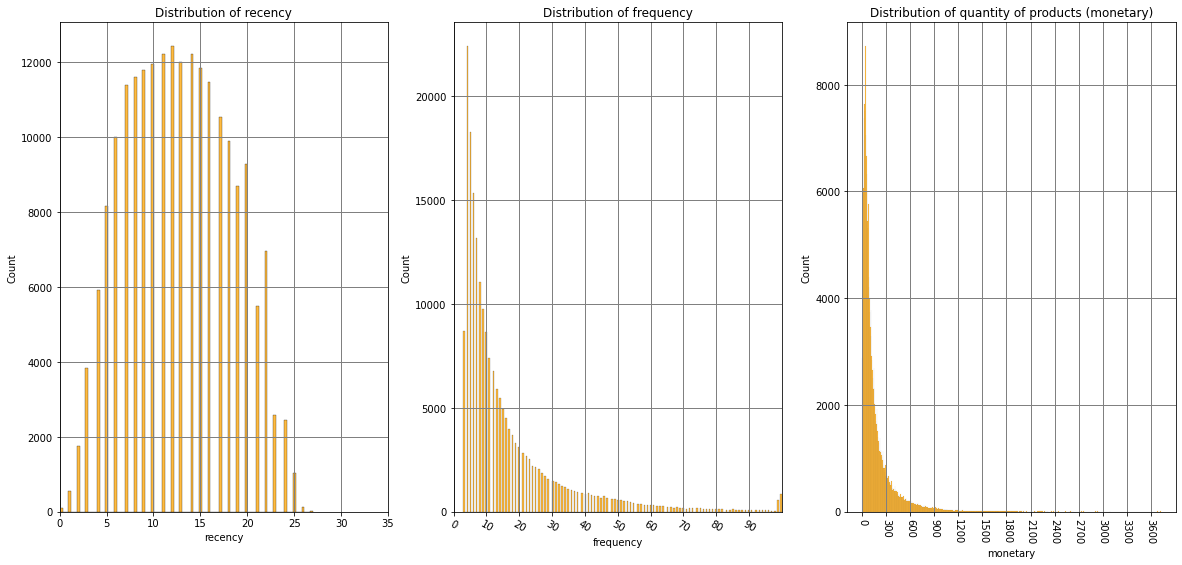

In [14]:
plt.figure(figsize=(20,9))
plt.subplot(1,3,1)
plt.title('Distribution of recency')
plt.xticks( np.arange(0, 100, 5), rotation=0 )
plt.xlim((0,35))
plt.grid(color='gray', linestyle='-', linewidth=1)
sns.histplot(df_rfm['recency'], color='orange')

plt.subplot(1,3,2)
plt.title('Distribution of frequency')
plt.xticks(np.arange(0,100, 10), rotation=-30)
plt.xlim((0,100))
plt.grid(color='gray', linestyle='-', linewidth=1)
sns.histplot(df_rfm['frequency'], color='orange')

plt.subplot(1,3,3)
plt.title('Distribution of quantity of products (monetary)')
plt.xticks(np.arange(0,3730, 300), rotation=-90 )
plt.grid(color='gray', linestyle='-', linewidth=1)
sns.histplot(df_rfm['monetary'], color='orange')

In [15]:
def recency(df):
  if df['recency']>0 and df['recency']<9:
    return 4
  elif df['recency']>8 and df['recency']<14:
    return 3
  elif df['recency']>13 and df['recency']<18:
    return 2
  else:
    return 1

def frequency(df):
  if df['frequency']>19 and df['frequency']<101:
    return 4
  elif df['frequency']>9 and df['frequency']<20:
    return 3
  elif df['frequency']>5 and df['frequency']<10:
    return 2
  else:
    return 1

def monetary(df):
  if df['monetary']>194 and df['monetary']<3726:
    return 4
  elif df['monetary']>89 and df['monetary']<195:
    return 3
  elif df['monetary']>43 and df['monetary']<90:
    return 2
  else:
    return 1

In [16]:
df_rfm['recency_score'] = df_rfm.apply(recency, axis=1)
df_rfm['frequency_score'] = df_rfm.apply(frequency, axis=1)
df_rfm['monetary_score'] = df_rfm.apply(monetary, axis=1)

In [17]:
df_rfm['rfm_score'] = df_rfm['recency_score'] + df_rfm['frequency_score'] + df_rfm['monetary_score']
df_rfm

,user_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
0,1,17,11,70,2,3,2,7
1,2,15,15,226,2,3,4,9
2,3,11,12,88,3,3,2,8
3,4,11,5,18,3,1,1,5
4,5,9,5,46,3,1,2,6
...,...,...,...,...,...,...,...,...
206204,206205,12,4,51,3,1,2,6
206205,206206,3,67,285,4,4,4,12
206206,206207,13,16,223,3,3,4,10
206207,206208,7,49,677,4,4,4,12


In [24]:
def segment(df):
  if  df['recency_score'] == 4 and df['frequency_score'] == 4 and df['monetary_score'] == 4:
    return 'Champion'
  elif  df['recency_score'] >= 2 and df['frequency_score'] >= 3 and df['monetary_score'] >= 4:
    return 'Loyal Customer'
  elif df['recency_score'] >= 3 and df['frequency_score'] >= 1 and df['frequency_score'] <= 3 and df['monetary_score'] >= 1 and df['monetary_score'] <= 3:
    return 'Potential Loyalist'
  elif df['recency_score'] >= 4 and df['frequency_score'] < 2 and df['monetary_score'] < 2:
    return 'New Customer'
  elif df['recency_score'] >= 3 and df['frequency_score'] < 2 and df['monetary_score'] < 2:
    return 'Promising'
  elif df['recency_score'] >= 3 and df['frequency_score'] >= 3 and df['monetary_score'] >= 3:
    return 'Need Attention'
  elif df['recency_score'] >= 2 and df['recency_score'] <=3 and df['frequency_score'] >= 3 and df['monetary_score'] >= 3:
    return 'About To Sleep'
  elif df['recency_score'] < 3 and df['frequency_score'] >= 2 and df['monetary_score'] >= 2:
    return 'At Risk'
  elif df['recency_score'] < 2 and df['frequency_score'] >= 4  and df['monetary_score'] >= 4:
    return 'Cannot Lose Them'
  elif df['recency_score'] >= 2 and df['recency_score'] <= 3 and df['frequency_score'] >= 2 and df['frequency_score'] <= 3 and df['monetary_score'] >= 2 and df['monetary_score'] <= 4:
    return 'Hibernating'
  elif df['recency_score'] < 2 and df['frequency_score'] < 2 and df['monetary_score'] < 2:
    return 'Lost'
  else:
    return 'General'


In [25]:
df_rfm['seg'] = df_rfm.apply(segment, axis = 1)
df_rfm

,user_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,seg
0,1,17,11,70,2,3,2,7,At Risk
1,2,15,15,226,2,3,4,9,Loyal Customer
2,3,11,12,88,3,3,2,8,Potential Loyalist
3,4,11,5,18,3,1,1,5,Potential Loyalist
4,5,9,5,46,3,1,2,6,Potential Loyalist
...,...,...,...,...,...,...,...,...,...
206204,206205,12,4,51,3,1,2,6,Potential Loyalist
206205,206206,3,67,285,4,4,4,12,Champion
206206,206207,13,16,223,3,3,4,10,Loyal Customer
206207,206208,7,49,677,4,4,4,12,Champion


In [28]:
fig = px.scatter_ternary(df_rfm, a='monetary',
                         b="recency", c="frequency",
                         color="seg")
fig.show();

In [27]:
df_temp = df_rfm[['user_id','seg']]
df = pd.merge(df, df_temp, on = ['user_id','user_id'])
df

,order_id,user_id,product_name,aisle,department,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,seg
0,2,202279,Organic Egg Whites,eggs,dairy eggs,3,5,9,8.0,1,1,At Risk
1,2,202279,Michigan Organic Kale,fresh vegetables,produce,3,5,9,8.0,2,1,At Risk
2,2,202279,Garlic Powder,spices seasonings,pantry,3,5,9,8.0,3,0,At Risk
3,2,202279,Coconut Butter,oils vinegars,pantry,3,5,9,8.0,4,1,At Risk
4,2,202279,Natural Sweetener,baking ingredients,pantry,3,5,9,8.0,5,0,At Risk
...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,2736264,183315,Lightweight Extreme Scented Cat Litter,cat food care,pets,3,0,22,15.0,1,1,General
33819102,276317,66343,Fresh Farmed Tilapia Fillet,packaged seafood,meat seafood,3,6,15,19.0,1,1,Lost
33819103,484769,66343,Fresh Farmed Tilapia Fillet,packaged seafood,meat seafood,1,6,11,0.0,1,0,Lost
33819104,1561557,66343,Fresh Farmed Tilapia Fillet,packaged seafood,meat seafood,2,1,11,30.0,1,1,Lost
